# 尝试做一次线性回归

In [1]:
# 1. 导入所需要的库和函数
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.datasets import fetch_california_housing as fch
import pandas as pd

In [2]:
# 2. 导入数据，探索数据
housevalue = fch()
x = pd.DataFrame(housevalue.data)

In [3]:
y = housevalue.target

In [4]:
x

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [6]:
housevalue.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [7]:
[*x.columns]

[0, 1, 2, 3, 4, 5, 6, 7]

In [8]:
x.columns = housevalue.feature_names

In [9]:
[*x.columns]

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [10]:
# 分训练集和测试集
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=420)

In [11]:
# 恢复索引，一定要恢复索引
for i in [x_train,x_test]:
    i.index = range(i.shape[0])

In [12]:
x_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1.7656,42.0,4.144703,1.031008,1581.0,4.085271,33.96,-118.28
1,1.5281,29.0,5.095890,1.095890,1137.0,3.115068,39.29,-121.68
2,4.1750,14.0,5.604699,1.045965,2823.0,2.883555,37.14,-121.64
3,3.0278,52.0,5.172932,1.085714,1663.0,2.500752,37.78,-122.49
4,4.5000,36.0,4.940447,0.982630,1306.0,3.240695,33.95,-118.09
...,...,...,...,...,...,...,...,...
6187,4.7250,44.0,5.969945,0.975410,943.0,2.576503,37.94,-122.08
6188,2.8500,38.0,5.089347,1.089347,1080.0,3.711340,32.68,-117.06
6189,3.7857,39.0,5.663507,1.052133,1246.0,2.952607,34.06,-118.14
6190,3.7500,38.0,5.275229,0.981651,259.0,2.376147,38.72,-121.90


In [13]:
# 先分训练集和测试集，然后再进行数据标准化
# 先用训练集训练（fit）标准化的类，然后用训练好的类分别转化(transform)训练集和测试集

In [14]:
# 建模
reg = LR(normalize=True).fit(x_train,y_train)
yhat = reg.predict(x_test)
yhat

array([1.51384887, 0.46566247, 2.2567733 , ..., 2.11885803, 1.76968187,
       0.73219077])

In [15]:
yhat.min()

-0.6528439725035966

In [16]:
yhat.max()

7.146198214270861

In [17]:
# 查看系数向量
reg.coef_

array([ 4.37358931e-01,  1.02112683e-02, -1.07807216e-01,  6.26433828e-01,
        5.21612535e-07, -3.34850965e-03, -4.13095938e-01, -4.26210954e-01])

In [18]:
x_train.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [19]:
# 查看特征对应的系数，大小可以表明对标签的影响大小
[*zip(x_train.columns,reg.coef_)]

[('MedInc', 0.4373589305968401),
 ('HouseAge', 0.010211268294494032),
 ('AveRooms', -0.10780721617317679),
 ('AveBedrms', 0.6264338275363788),
 ('Population', 5.216125353264395e-07),
 ('AveOccup', -0.0033485096463335795),
 ('Latitude', -0.4130959378947717),
 ('Longitude', -0.42621095362084777)]

## 在线性回归中，损失函数式残差平方和，但是在衡量模型的评估指标的时候，我们如果仍然使用RSS 这个指标，因为这个指标的取值没有上限，也就是说，样本数量越大残差平方和的值也越大。虽然RSS越接近于0越好，但是这种情况下并不好衡量，因此我们使用均方误差MSE

### 在sklearn中有两种方式可以得到MSE，其中一种方式是使用metrics中的mean_squared_error这个包
### 另外一种是使用交叉验证类中的scoring参数来设置均方误差

In [20]:

from sklearn.metrics import mean_squared_error as MSE
MSE(yhat,y_test)

0.5309012639324573

In [21]:
# 可以看出误差相对来说还是比较大的 
y_test.mean()

2.0819292877906976

In [22]:
# 使用交叉验证的方式,注意在交叉验证中
cross_val_score(reg,x,y,cv=10,scoring='neg_mean_squared_error').mean()

-0.5509524296956596

In [23]:
# 使用下面的命令可以看到sklearn中所有的模型评估指标
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [24]:
# 调用r平方
from sklearn.metrics import r2_score
r2_score(yhat,y_test)

0.33806537615559973

In [25]:
r2 = reg.score(x_test,y_test)

In [26]:
r2

0.6043668160178814

In [27]:
# 从上面的结果中我们可以看出，同样的评估指标
# 用不同的方法调用（metrics和score）有不同的结果 
# 这里和分类的情况不同，对于score这个接口
# 需要通过shift+tab键来检查需要输入的参数和对应的位置
r2_score(y_test,yhat)

0.6043668160178814

In [28]:
# 可以看到现在值就相同了
# 或者可以直接指定参数，就不会有顺序的问题了
r2_score(y_true=y_test,y_pred=yhat)

0.6043668160178814

In [29]:
# 交叉验证中的r平方值
cross_val_score(reg,x,y,cv=10,scoring='r2').mean()

0.5110068610524555

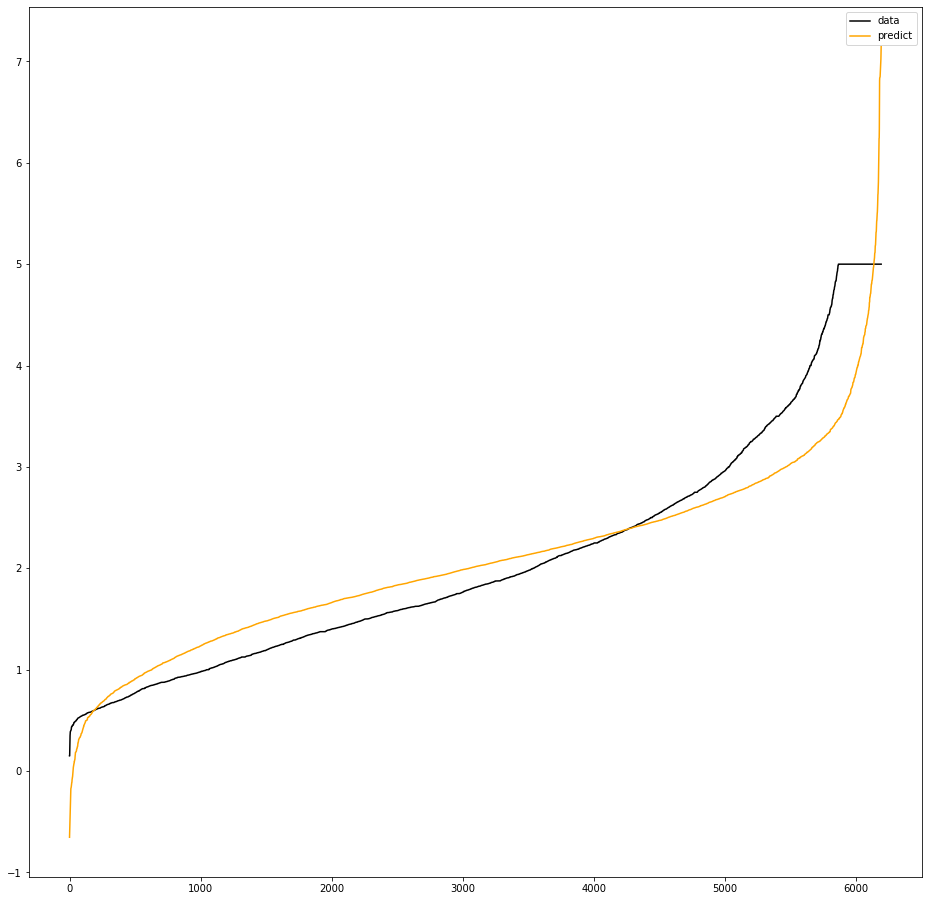

In [39]:
# 根据数据结果，mse并不大，但是r平方的值很小，这种情况是
# 一部分数据模拟正确，但是数据的分布并没有拟合的非常好
# 可以绘制曲线来看一看是什么情况
import matplotlib.pyplot as plt
# 在绘图的时候会对原本的y_test和yhat都进行排序，否则会非常乱
plt.figure(figsize=[16,16])
plt.plot(range(len(y_test)),sorted(y_test),c='black',label='data')
plt.plot(range(len(yhat)),sorted(yhat),c='orange',label='predict')
plt.legend()
plt.show()

In [33]:
type(y_test)

numpy.ndarray

In [34]:
y_test

array([0.967, 0.616, 2.298, ..., 2.457, 1.875, 0.683])

In [40]:
# 使用numpy创建一组数据
import numpy as np
rng = np.random.RandomState(42)

In [41]:
x = rng.randn(100,80)
y = rng.randn(100)
cross_val_score(LR(),x,y,cv=5,scoring='r2')

array([-180.3101809 ,   -5.64216644,  -15.16746093,  -78.50015591,
        -66.04337804])

In [42]:
# 为什么会有负的r平方呢
# 可以用数学的方式去证明，这种情况就是我们的模型非常糟糕

# 岭回归
## 岭回归产生的原因
在线性回归中，如果存在多重共线性（精确相关关系或高度相关关系）那么这种情况下，特征矩阵求解就会出现除0
错误。而岭回归就是为了要解决这个问题。解决的方法是增加一个正则项。这个正则项的表达式是系数矩阵的L2范式乘以一个正则项系数$\alpha$

In [43]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing as fch
from sklearn.linear_model import Ridge,LinearRegression,Lasso
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt

In [44]:
housevalue = fch()

In [45]:
x = pd.DataFrame(housevalue.data)

In [48]:
y = housevalue.target

In [49]:
x.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [50]:
x.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [51]:
# 分割训练集和测试集
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=420)

In [52]:
# 数据集恢复索引，养成良好习惯
for i in [x_train,x_test]:
    i.index = range(i.shape[0])

In [53]:
# 使用岭回归进行建模
reg = Ridge(alpha=1).fit(x_train,y_train)

In [54]:
reg.score(x_test,y_test)

0.6043610352312276

In [55]:
# 下面对比交叉验证下，岭回归和线性回归结果的变化
alpharange = np.arange(1,1001,100)

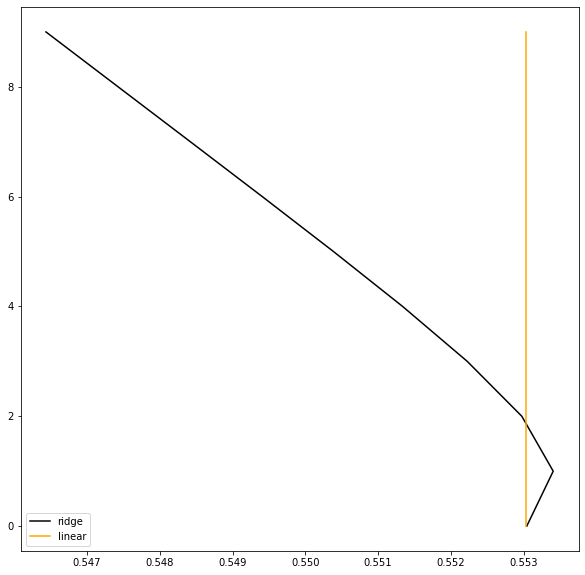

In [56]:
from sklearn.model_selection import cross_val_score
ridge,lr = [],[]
for alpha in alpharange:
    # 岭回归模型
    reg = Ridge(alpha=alpha)
    # 线性回归模型
    linear = LinearRegression()
    regs = cross_val_score(reg,x,y,cv=5,scoring='r2').mean()
    linears = cross_val_score(linear,x,y,cv=5,scoring='r2').mean()
    ridge.append(regs)
    lr.append(linears)
# 绘图
plt.figure(figsize=[10,10])
plt.plot(ridge,range(len(ridge)),c='black',label='ridge')
plt.plot(lr,range(len(lr)),c='orange',label='linear')
plt.legend()
plt.show()